In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data_path = 'data.csv'                                                              # C:/Users/anura/Downloads/data.csv
df = pd.read_csv(data_path)


In [2]:
# Display the first few rows of the dataframe
print(df.head())

# Check the info of the dataframe to understand its structure
print(df.info())

# Check for missing values
print(df.isnull().sum())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [3]:
# Preprocessing
# Assume 'diagnosis' is the target column and all other columns are features
# Encoding target variable (Malignant - M, Benign - B)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Splitting the data into features and target
df_drop = df.drop(columns=['id','Unnamed: 32'])                     # dropping unwanted columns

# Selecting the mean components 
cols=[col for col in df.columns if 'mean' in col]
X = df[cols]
y = df['diagnosis']

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
# Define a function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, cm, report

# Import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [6]:
# # Initialize models
# logistic_model = LogisticRegression()
# decision_tree_model = DecisionTreeClassifier()
# random_forest_model = RandomForestClassifier()
# svm_model = SVC()
# knn_model = KNeighborsClassifier()

# # Evaluate models
# models = {
#     'Logistic Regression': logistic_model,
#     'Decision Tree': decision_tree_model,
#     'Random Forest': random_forest_model,
#     'SVM': svm_model,
#     'KNN': knn_model
# }

# for model_name, model in models.items():
#     print(f'Evaluating {model_name}...')
#     accuracy, cm, report = evaluate_model(model, X_train, X_test, y_train, y_test)
#     print(f'Accuracy: {accuracy}')
#     print(f'Confusion Matrix:\n{cm}')
#     print(f'Classification Report:\n{report}')
#     print('-----------------------------------')


In [7]:

# Initialize models
logistic_model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
svm_model = SVC()

# Evaluate models
models = {
    'Logistic Regression': logistic_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model,
    'SVM': svm_model
}

for model_name, model in models.items():
    print(f'Evaluating {model_name}...')
    accuracy, cm, report = evaluate_model(model, X_train, X_test, y_train, y_test)
    if accuracy is not None:
        print(f'Accuracy: {accuracy}')
        print(f'Confusion Matrix:\n{cm}')
        print(f'Classification Report:\n{report}')
    print('-----------------------------------')


Evaluating Logistic Regression...
Accuracy: 0.9385964912280702
Confusion Matrix:
[[68  3]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

-----------------------------------
Evaluating Decision Tree...
Accuracy: 0.9298245614035088
Confusion Matrix:
[[67  4]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

-----------------------------------
Evaluating Random Forest...
Accura

In [8]:
# Import necessary libraries
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier

# Define base models for stacking
bagged_lr = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000), n_estimators=10, random_state=42)
boosted_svm = AdaBoostClassifier(base_estimator=SVC(probability=True, kernel='rbf'), n_estimators=20, random_state=42)

# Define the final estimator
final_estimator = RandomForestClassifier(random_state=42)

# Create the stacking ensemble
stacking_model_1 = StackingClassifier(
    estimators=[('bagged_lr', bagged_lr), ('boosted_svm', boosted_svm)],
    final_estimator=final_estimator,
    passthrough=True
)

# Train and evaluate the stacking model
stacking_model_1.fit(X_train, y_train)
y_pred_1 = stacking_model_1.predict(X_test)

# Print evaluation metrics
print("Stacking Bagged Logistic Regression and Boosted SVM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_1)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_1)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_1)}")


Stacking Bagged Logistic Regression and Boosted SVM:
Accuracy: 0.9824561403508771
Confusion Matrix:
[[71  0]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [9]:
# Define base models for stacking
bagged_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
boosted_rf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=20, random_state=42), n_estimators=50, random_state=42)

# Define the final estimator
final_estimator = LogisticRegression(max_iter=1000)

# Create the stacking ensemble
stacking_model_2 = StackingClassifier(
    estimators=[('bagged_dt', bagged_dt), ('boosted_rf', boosted_rf)],
    final_estimator=final_estimator,
    passthrough=True
)

# Train and evaluate the stacking model
stacking_model_2.fit(X_train, y_train)
y_pred_2 = stacking_model_2.predict(X_test)

# Print evaluation metrics
print("Stacking Bagged Decision Trees and Boosted Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_2)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_2)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_2)}")


Stacking Bagged Decision Trees and Boosted Random Forest:
Accuracy: 0.9649122807017544
Confusion Matrix:
[[69  2]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



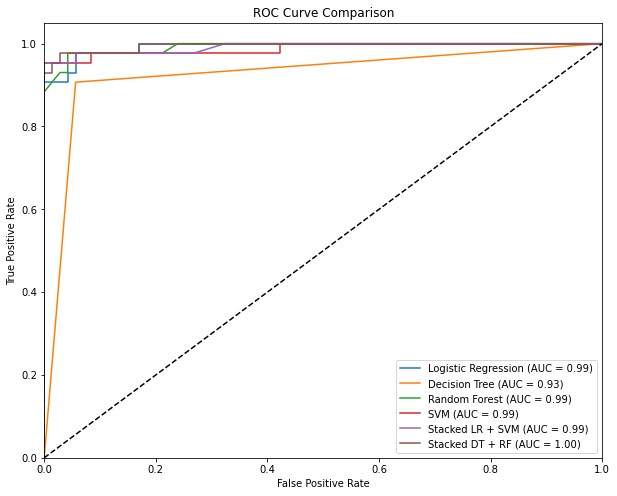

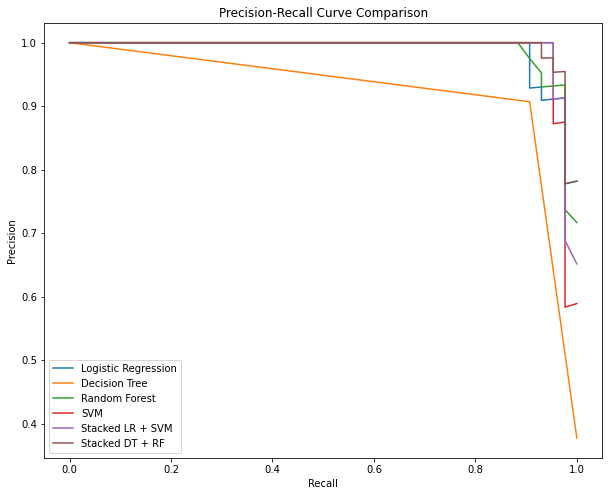

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Function to plot ROC curve for all models
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for model_name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:  # SVM with probability=False
            y_proba = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot Precision-Recall curve for all models
def plot_precision_recall_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for model_name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:  # SVM with probability=False
            y_proba = model.decision_function(X_test)
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.plot(recall, precision, label=f'{model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve Comparison')
    plt.legend(loc='lower left')
    plt.show()

# List of models for evaluation
models = {
    'Logistic Regression': logistic_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model,
    'SVM': svm_model,
    'Stacked LR + SVM': stacking_model_1,
    'Stacked DT + RF': stacking_model_2
}

# Plot ROC Curve
plot_roc_curve(models, X_test, y_test)

# Plot Precision-Recall Curve
plot_precision_recall_curve(models, X_test, y_test)


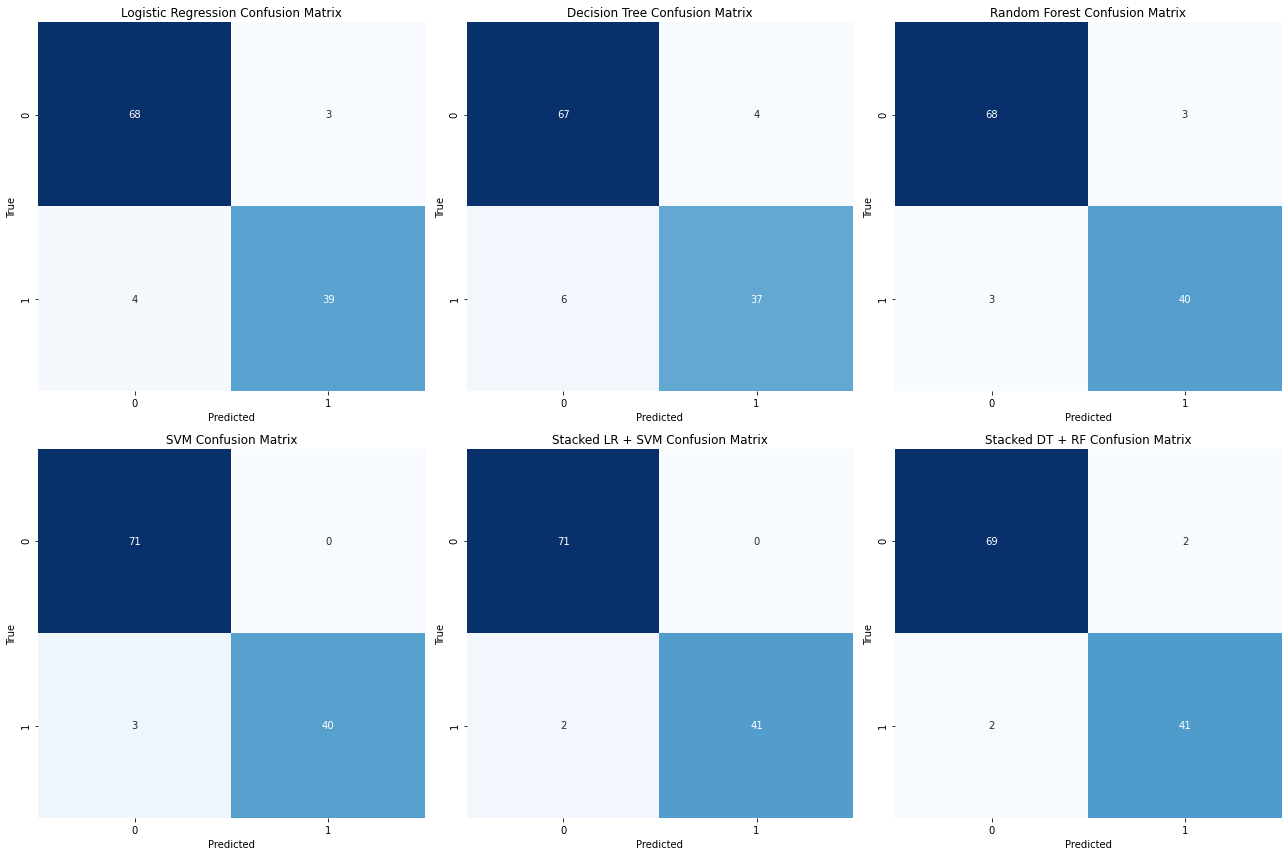

In [11]:
# Import necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier

# Generate confusion matrices for all models
conf_matrices = {}

# Evaluate individual models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrices[model_name] = confusion_matrix(y_test, y_pred)

# Evaluate Stacking model 1
y_pred_1 = stacking_model_1.predict(X_test)
conf_matrices['Stacked LR + SVM'] = confusion_matrix(y_test, y_pred_1)

# Evaluate Stacking model 2
y_pred_2 = stacking_model_2.predict(X_test)
conf_matrices['Stacked DT + RF'] = confusion_matrix(y_test, y_pred_2)

# Plot confusion matrix heatmaps
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for ax, (model_name, cm) in zip(axes.flatten(), conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()


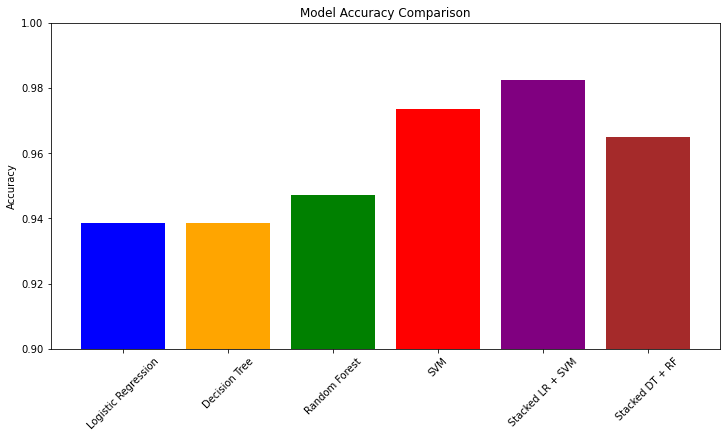

In [12]:
import numpy as np

# Assuming the accuracy scores are already calculated
accuracy_scores = {
    'Logistic Regression': 0.9385,
    'Decision Tree': 0.9298,
    'Random Forest': 0.9473,
    'SVM': 0.9736,
    'Stacked LR + SVM': 0.9824,
    'Stacked DT + RF': 0.9649
}

plt.figure(figsize=(12, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.ylim([0.9, 1.0])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()


# Stacked LR + SVM classifier model

* Of all the models, **stacked(LR+SVM)** has <u>higher accuracy</u>, <u>perfect precision for class 1</u>, and <u>perfect recall for class 0</u>.

This indicates that the model handles both classes better as compared to other models with no false positives for class 1 and no false negatives for class 0.

Stacking Bagged Logistic Regression and Boosted SVM:
Accuracy: 0.9824561403508771
Confusion Matrix:
[[71  0]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



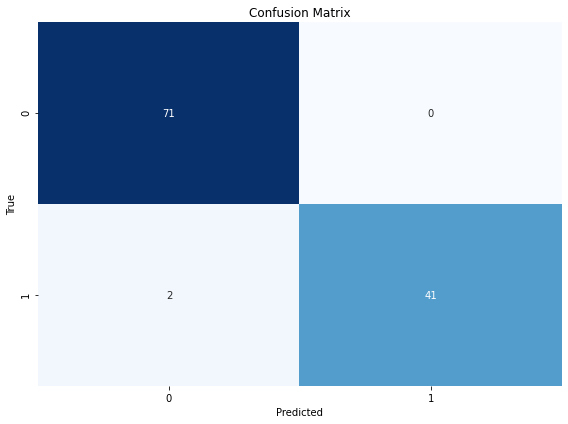

In [13]:
# Define base models for stacking
bagged_lr = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000), n_estimators=10, random_state=42)
boosted_svm = AdaBoostClassifier(base_estimator=SVC(probability=True, kernel='rbf'), n_estimators=20, random_state=42)

# Define the final estimator
final_estimator = RandomForestClassifier(random_state=42)

# Create the final classifier
clf = StackingClassifier(
    estimators=[('bagged_lr', bagged_lr), ('boosted_svm', boosted_svm)],
    final_estimator=final_estimator,
    passthrough=True
)

# Train and evaluate the stacking model
clf.fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)

# Print evaluation metrics
print("Stacking Bagged Logistic Regression and Boosted SVM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_1)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_1)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_1)}")


# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_1), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

## Saving the Model

In [14]:
# importing pickle library for saving the model
import pickle
pickle.dump(clf, open('model.pkl','wb'))


# Validation

Taking some random features from testing dataset

In [63]:
# Creating a dataframe for testing set
df_test = pd.DataFrame(X_test, columns=X.columns) 
df_test['diagnosis'] = y_test.reset_index(drop=True)
df_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,-0.470694,-0.160486,-0.448110,-0.491999,0.234114,0.027651,-0.109847,-0.276232,0.413949,0.132176,0
1,1.366877,0.470149,1.302886,1.351264,-0.446227,-0.027309,0.241064,0.789060,-0.838325,-1.160679,1
2,0.378508,0.044296,0.400820,0.267377,0.913744,0.340350,0.725686,0.824140,0.435855,-0.685782,1
3,-0.490575,-0.374576,-0.432457,-0.532101,0.643316,0.516599,-0.142993,-0.539846,-0.002259,1.165609,0
4,-0.734828,-1.128546,-0.713374,-0.716683,0.247636,0.145150,-0.269044,-0.592724,0.023298,0.711976,0
...,...,...,...,...,...,...,...,...,...,...,...
109,0.145616,-0.567723,0.092306,0.031601,-0.708116,-0.708046,-0.463019,-0.541910,-1.469938,-1.310945,0
110,0.551757,0.083856,0.499677,0.463051,-0.333074,-0.380943,0.111622,0.450385,-0.049721,-1.259911,1
111,-0.740508,-1.014519,-0.745503,-0.707013,0.351537,-0.497685,-0.571494,-0.506314,0.260609,-0.158433,0
112,0.026330,1.992051,0.023930,-0.088136,-1.005588,-0.008357,0.269940,-0.124821,-1.714551,-0.213719,0


In [69]:
df_test.iloc[0,:].tolist()

[-0.4706943812982658,
 -0.16048583674764194,
 -0.4481095638166044,
 -0.49199876193817454,
 0.23411429264902017,
 0.027650508220063597,
 -0.1098474072473257,
 -0.27623151932009027,
 0.4139489672882032,
 0.13217600714105998,
 0.0]